In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('/root/workspace/open/train.csv')
sales = pd.read_csv('/root/workspace/open/sales.csv')
info = pd.read_csv('/root/workspace/open/product_info.csv')
brand = pd.read_csv('/root/workspace/open/brand_keyword_cnt.csv')

In [3]:
train.head()

,ID,제품,대분류,중분류,소분류,브랜드,쇼핑몰,2022-01-01,2022-01-02,2022-01-03,...,2023-04-15,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24
0,SAMPLE_00000,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,S001-00001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SAMPLE_00001,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,...,2,0,2,0,2,2,1,0,0,0
2,SAMPLE_00002,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SAMPLE_00003,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SAMPLE_00004,B002-00002-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00010,0,0,0,...,10,6,4,4,4,0,0,0,0,8


In [62]:
train['대분류2'] = train['대분류'].str[-1:]

In [97]:
train['중분류2'] = train['중분류'].str[-2:]

In [98]:
train['소분류2'] = train['소분류'].str[-2:]

In [5]:
train['쇼핑몰'].value_counts()

S001-00001    11226
S001-00004     6927
S001-00003     3250
S001-00002     3104
S001-00010     1844
S001-00008     1748
S001-00005      519
S001-00007      116
S001-00006       81
S001-00009       79
Name: 쇼핑몰, dtype: int64

In [73]:
train['쇼핑몰'].value_counts()

S001-00001    11226
S001-00004     6927
S001-00003     3250
S001-00002     3104
S001-00010     1844
S001-00008     1748
S001-00005      519
S001-00007      116
S001-00006       81
S001-00009       79
Name: 쇼핑몰, dtype: int64

In [77]:
shop = train['쇼핑몰'].value_counts().index

In [78]:
shop

Index(['S001-00001', 'S001-00004', 'S001-00003', 'S001-00002', 'S001-00010',
       'S001-00008', 'S001-00005', 'S001-00007', 'S001-00006', 'S001-00009'],
      dtype='object')

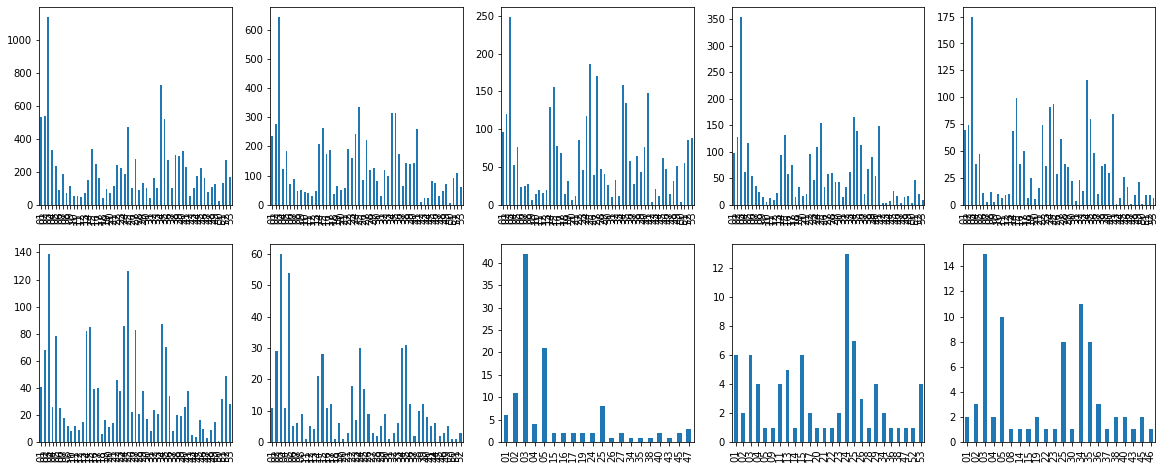

In [100]:
plt.figure(figsize=(20,8))
for i in range(len(shop)):
    vc = train.loc[train['쇼핑몰']==shop[i],]['소분류2'].value_counts().sort_index()
    plt.subplot(2, 5, i+1)
    vc.plot.bar()

In [133]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

a = [[2778, 572, 1069, 746, 1492, 1137, 1819, 327, 824, 22, 440],
    [1464, 346, 946, 523, 1391, 642, 980, 58, 400, 7, 170],
    [594, 118, 483, 183, 750, 239, 404, 37, 263, 4, 175],
    [758, 147, 406, 214, 607, 317, 484, 14, 123, 4, 30],
    [404, 45, 281, 156, 432, 178, 242, 7, 83, 1, 15],
    [352, 75, 276, 125, 414, 157, 177, 9, 85, 1, 77],
    [165, 21, 82, 35, 71, 49, 75, 6, 11, 1, 3],
    [84, 0, 6, 2, 13, 1, 4, 1, 5, 0, 0],
    [19, 5, 14, 5, 28, 2, 2, 0, 1, 0, 5],
    [32, 1, 2, 4, 8, 12, 16, 1, 3, 0, 0]]

mmin = []
mmax = []

for i in range(len(a)):
    mmin.append(min(a[i]))
    mmax.append(max(a[i]))

final = []
for i in range(len(a)):
    tmp = []
    for j in range(len(a[0])):
        tmp.append((a[i][j] - mmin[i])/(mmax[i] - mmin[i]))
    
    final.append(tmp)

a_np = np.array(final)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(a_np)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(cluster_labels)
print(cluster_centers)

[2 1 1 1 1 1 2 2 0 2]
[[0.67857143 0.17857143 0.5        0.17857143 1.         0.07142857
  0.07142857 0.         0.03571429 0.         0.17857143]
 [0.91515969 0.171281   0.62704683 0.30649685 0.94992636 0.39087133
  0.56518465 0.02515871 0.23367746 0.         0.11841619]
 [1.         0.08819145 0.25193235 0.15470654 0.34124322 0.27103988
  0.41271762 0.04607755 0.12631272 0.         0.04096605]]


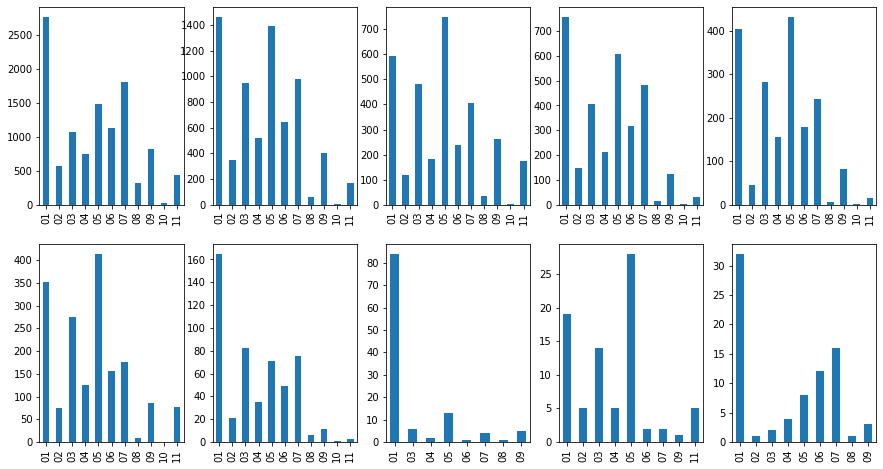

In [90]:
plt.figure(figsize=(15,8))
for i in range(len(shop)):
    vc = train.loc[train['쇼핑몰']==shop[i],]['중분류2'].value_counts().sort_index()
    plt.subplot(2, 5, i+1)
    vc.plot.bar()

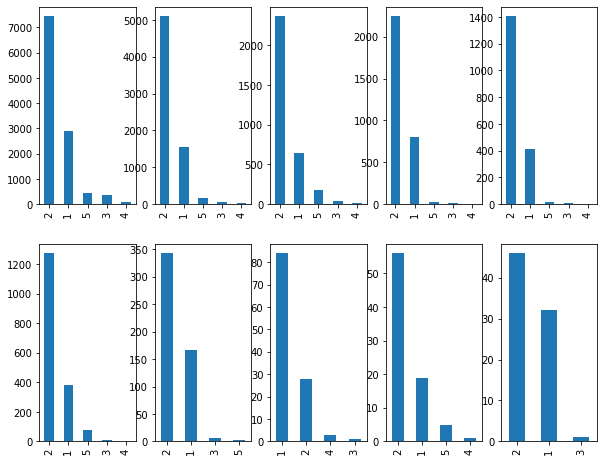

In [91]:
plt.figure(figsize=(10,8))
for i in range(len(shop)):
    vc = train.loc[train['쇼핑몰']==shop[i],]['대분류2'].value_counts()
    plt.subplot(2, 5, i+1)
    vc.plot.bar()

In [107]:
shop_df = pd.DataFrame(train['쇼핑몰'].value_counts()).reset_index().reset_index()

In [109]:
shop_df.columns = ['쇼핑몰순위', '쇼핑몰',' 쇼핑몰개수']

In [110]:
shop_df

,쇼핑몰순위,쇼핑몰,쇼핑몰개수
0,0,S001-00001,11226
1,1,S001-00004,6927
2,2,S001-00003,3250
3,3,S001-00002,3104
4,4,S001-00010,1844
5,5,S001-00008,1748
6,6,S001-00005,519
7,7,S001-00007,116
8,8,S001-00006,81
9,9,S001-00009,79


In [114]:
new = train.merge(shop_df, left_on='쇼핑몰', right_on='쇼핑몰', how='left')

In [125]:
new

,ID,제품,대분류,중분류,소분류,브랜드,쇼핑몰,2022-01-01,2022-01-02,2022-01-03,...,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24,대분류2,중분류2,소분류2,쇼핑몰순위,쇼핑몰개수
0,SAMPLE_00000,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,S001-00001,0,0,0,...,0,0,0,0,0,2,07,38,0,11226
1,SAMPLE_00001,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,...,2,1,0,0,0,3,08,44,0,11226
2,SAMPLE_00002,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,...,0,0,0,0,0,3,08,44,0,11226
3,SAMPLE_00003,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00001,0,0,0,...,0,0,0,0,0,3,08,44,0,11226
4,SAMPLE_00004,B002-00002-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00010,0,0,0,...,0,0,0,0,8,3,08,44,4,1844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28889,SAMPLE_28889,B002-03798-00046,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00001,0,0,0,...,0,0,0,0,0,3,08,44,0,11226
28890,SAMPLE_28890,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,S001-00001,0,0,0,...,0,0,0,0,0,3,08,42,0,11226
28891,SAMPLE_28891,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,0,0,0,...,0,4,0,2,0,3,08,44,0,11226
28892,SAMPLE_28892,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,S001-00001,0,0,0,...,0,0,0,0,0,3,08,44,0,11226


In [126]:
new[['ID', '쇼핑몰순위',' 쇼핑몰개수']]

,ID,쇼핑몰순위,쇼핑몰개수
0,SAMPLE_00000,0,11226
1,SAMPLE_00001,0,11226
2,SAMPLE_00002,0,11226
3,SAMPLE_00003,0,11226
4,SAMPLE_00004,4,1844
...,...,...,...
28889,SAMPLE_28889,0,11226
28890,SAMPLE_28890,0,11226
28891,SAMPLE_28891,0,11226
28892,SAMPLE_28892,0,11226


In [132]:
len(train['브랜드'].unique())

2895

In [16]:
import random
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import argparse

# from exp.exp_main import Exp_Main
from models import Informer, Autoformer, Transformer, DLinear, Linear, NLinear, PatchTST

# from utils.tools import EarlyStopping, adjust_learning_rate, visual, test_params_flop
# from utils.metrics import metric

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

parser = argparse.ArgumentParser(description="Autoformer & Transformer family for Time Series Forecasting")
# basic config
parser.add_argument("--is_training", type=int, default=1, help="status")
parser.add_argument("--train_only", type=bool, default=False, help="perform training on full input dataset without validation and testing")
parser.add_argument("--model_id", type=str, default="test", help="model id")
parser.add_argument("--model", type=str, default="Autoformer",
                    help="model name, options: [Autoformer, Informer, Transformer]")

# forecasting task
parser.add_argument("--seq_len", type=int, default=104, help="input sequence length")
parser.add_argument("--label_len", type=int, default=104, help="start token length")
parser.add_argument("--pred_len", type=int, default=21, help="prediction sequence length")


# DLinear
parser.add_argument("--individual", action="store_true", default=False, help="DLinear: a linear layer for each variate(channel) individually")
# Formers 
parser.add_argument("--embed_type", type=int, default=0, help="0: default 1: value embedding + temporal embedding + positional embedding 2: value embedding + temporal embedding 3: value embedding + positional embedding 4: value embedding")
parser.add_argument("--enc_in", type=int, default=11, help="encoder input size") # DLinear with --individual, use this hyperparameter as the number of channels
parser.add_argument("--dec_in", type=int, default=11, help="decoder input size")
parser.add_argument("--c_out", type=int, default=11, help="output size")
parser.add_argument("--d_model", type=int, default=64, help="dimension of model")
parser.add_argument("--n_heads", type=int, default=16, help="num of heads")
parser.add_argument("--e_layers", type=int, default=3, help="num of encoder layers")
parser.add_argument("--d_layers", type=int, default=64, help="num of decoder layers")
parser.add_argument("--d_ff", type=int, default=128, help="dimension of fcn")
parser.add_argument("--moving_avg", type=int, default=25, help="window size of moving average")
parser.add_argument("--factor", type=int, default=1, help="attn factor")
parser.add_argument("--distil", action="store_false",
                    help="whether to use distilling in encoder, using this argument means not using distilling",
                    default=True)
parser.add_argument("--dropout", type=float, default=0.3, help="dropout")
parser.add_argument("--embed", type=str, default="timeF",
                    help="time features encoding, options:[timeF, fixed, learned]")
parser.add_argument("--activation", type=str, default="gelu", help="activation")
parser.add_argument("--output_attention", action="store_true", help="whether to output attention in ecoder")
parser.add_argument("--do_predict", action="store_true", help="whether to predict unseen future data")

# optimization
parser.add_argument("--num_workers", type=int, default=10, help="data loader num workers")
parser.add_argument("--itr", type=int, default=2, help="experiments times")
parser.add_argument("--train_epochs", type=int, default=10, help="train epochs")
parser.add_argument("--batch_size", type=int, default=32, help="batch size of train input data")
parser.add_argument("--patience", type=int, default=3, help="early stopping patience")
parser.add_argument("--learning_rate", type=float, default=0.0001, help="optimizer learning rate")
parser.add_argument("--des", type=str, default="test", help="exp description")
parser.add_argument("--loss", type=str, default="mse", help="loss function")
parser.add_argument("--lradj", type=str, default="type1", help="adjust learning rate")
parser.add_argument("--use_amp", action="store_true", help="use automatic mixed precision training", default=False)

# GPU
#parser.add_argument("--use_gpu", type=bool, default=True, help="use gpu")
#parser.add_argument("--gpu", type=int, default=0, help="gpu")
#parser.add_argument("--use_multi_gpu", action="store_true", help="use multiple gpus", default=False)
#parser.add_argument("--devices", type=str, default="0,1,2,3", help="device ids of multile gpus")
#parser.add_argument("--test_flop", action="store_true", default=False, help="See utils/tools for usage")
args = parser.parse_args()

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

CFG = {
    "TRAIN_WINDOW_SIZE": 104,  # 104일치로 학습
    "PREDICT_SIZE": 21,  # 21일치 예측
    "EPOCHS": 20,
    "LEARNING_RATE": 1e-4,
    "BATCH_SIZE": 4096,
    "SEED": 41,
    "LAMBDA1": 0.1,
    "LAMBDA2": 10,
    "LR_LAMBDA": 0.85,  # lr scheduler에 사용되는 값
}


def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True


seed_everything(CFG["SEED"])  # Seed 고정

train_data = pd.read_csv("/root/workspace/data/train.csv").drop(columns=["ID", "제품"])
cond = (train_data["쇼핑몰"] != "S001-00001")
train_data = train_data[cond]
idx_number = train_data.index

output_kuka = train_data.iloc[:, -CFG["PREDICT_SIZE"] :].to_numpy()
product_features = pd.read_csv("/root/workspace/data/features4.csv").drop(
    columns=["Unnamed: 0","ID", "제품", "대분류", "중분류", "소분류", "브랜드","쇼핑몰"]
)
product_features = product_features[cond]
time_series_features = pd.read_csv("/root/workspace/data/total_dates_scaling2.csv").drop(
    columns=["Unnamed: 0", "Unnamed: 0.1", "Date"]
)

# preprocessing
numeric_cols = train_data.columns[5:]
min_values1 = train_data[numeric_cols].min(axis=1)
min_values= min_values1.reset_index(drop=True)
max_values1 = train_data[numeric_cols].max(axis=1)
max_values= max_values1.reset_index(drop=True)
ranges = max_values - min_values
ranges[ranges == 0] = 1
train_data[numeric_cols] = (train_data[numeric_cols].subtract(min_values, axis=0)).div(
    ranges, axis=0
)
scale_min_dict = min_values.to_dict()
scale_max_dict = max_values.to_dict()
#print(scale_min_dict)
#print(scale_max_dict)
# Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ["대분류", "중분류", "소분류", "브랜드"]
categorical_nums = [5, 11, 53, 2895]

for i, col in enumerate(categorical_columns):
    label_encoder.fit(train_data[col])
    train_data[col] = label_encoder.transform(train_data[col])
    train_data[col] = train_data[col].div(categorical_nums[i] - 1)  # minmax scaling

# (15890, 1)로 만들기, MinMax Scaling 사용
scaler1 = MinMaxScaler()
scaler1.fit(product_features[["판매량평균"]])
sales_mean_scaled = scaler1.transform(product_features[["판매량평균"]])

scaler2 = MinMaxScaler()
scaler2.fit(product_features[["제품수"]])
prod_num_scaled = scaler2.transform(product_features[["제품수"]])

scaler3 = MinMaxScaler()
scaler3.fit(product_features[["쇼핑몰판매량평균"]])
mall_mean_scaled = scaler3.transform(product_features[["쇼핑몰판매량평균"]])

nprice_mid = product_features[["NormalizedPrice_중분류"]].to_numpy()

product = np.column_stack((sales_mean_scaled, prod_num_scaled, mall_mean_scaled, nprice_mid))

# (459, 1)
sale_info = time_series_features["SaleInfo"].to_numpy()
holiday = time_series_features["Holiday"].to_numpy()
salary = time_series_features["Salary"].to_numpy()
month = time_series_features["Month"].to_numpy()
dayofweek = time_series_features["DayofWeek"].to_numpy()

time_series = np.stack((sale_info, holiday, salary, month, dayofweek))


def make_train_data(
    data, train_size=CFG["TRAIN_WINDOW_SIZE"], predict_size=CFG["PREDICT_SIZE"]
):
    """
    학습 기간 블럭, 예측 기간 블럭의 세트로 데이터를 생성
    data : 일별 판매량
    train_size : 학습에 활용할 기간
    predict_size : 추론할 기간
    """
    num_rows = len(data)
    window_size = train_size + predict_size

    input_data = np.empty(
        (
            num_rows * (len(data.columns) - window_size + 1),
            train_size,
            2 + product.shape[1] + time_series.shape[0] + 1,
        )
    )
    target_data = np.empty(
        (
            num_rows * (len(data.columns) - window_size + 1),
            predict_size,
            2 + product.shape[1] + time_series.shape[0] + 1,
        )
    )
    for i in tqdm(range(num_rows), dynamic_ncols=True):
        encode_info_big = np.array(data.iloc[i, 0])  # 대분류 소분류
        encode_info_small = np.array(data.iloc[i, 2])  # 대분류 소분류
        product_data = product[i, :]
        # time_series
        sales_data = np.array(data.iloc[i, 4:])

        for j in range(len(sales_data) - window_size + 1):
            time_series_window = time_series[:, j : j + window_size]
            window = sales_data[j : j + window_size]

            temp_data = np.concatenate(
                (
                    np.tile(encode_info_big, (train_size, 1)),
                    np.tile(encode_info_small, (train_size, 1)),
                    np.tile(product_data, (train_size, 1)),
                    time_series_window[:, :train_size].T,
                    window[:train_size].reshape((-1, 1)),
                ),
                axis=1,
            )
            temp_target = np.concatenate(
                (
                    np.tile(encode_info_big, (predict_size, 1)),
                    np.tile(encode_info_small, (predict_size, 1)),
                    np.tile(product_data, (predict_size, 1)),
                    time_series_window[:, train_size:].T,
                    window[train_size:].reshape((-1, 1)),
                ),
                axis=1,
            )
            input_data[i * (len(data.columns) - window_size + 1) + j] = temp_data
            target_data[i * (len(data.columns) - window_size + 1) + j] = temp_target

    return input_data, target_data


def make_predict_data(data, train_size=CFG["TRAIN_WINDOW_SIZE"]):
    """
    평가 데이터(Test Dataset)를 추론하기 위한 Input 데이터를 생성
    data : 일별 판매량
    train_size : 추론을 위해 필요한 일별 판매량 기간 (= 학습에 활용할 기간)
    """
    num_rows = len(data)

    input_data = np.empty(
        (num_rows, train_size, 2 + product.shape[1] + time_series.shape[0] + 1)
    )

    for i in tqdm(range(num_rows), dynamic_ncols=True):
        encode_info_big = np.array(data.iloc[i, 0])
        encode_info_small = np.array(data.iloc[i, 2])
        product_data = product[i, :]
        sales_data = np.array(data.iloc[i, -train_size:])

        time_series_window = time_series[:, -train_size:]
        window = sales_data[-train_size:]

        temp_data = np.concatenate(
            (
                np.tile(encode_info_big, (train_size, 1)),
                np.tile(encode_info_small, (train_size, 1)),
                np.tile(product_data, (train_size, 1)),
                time_series_window[:, :train_size].T,
                window[:train_size].reshape((-1, 1)),
            ),
            axis=1,
        )
        input_data[i] = temp_data

    return input_data


test_input = make_predict_data(train_data)  # test(submission)


class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __getitem__(self, index):
        if self.Y is not None:
            return torch.Tensor(self.X[index]), torch.Tensor(self.Y[index])
        return torch.Tensor(self.X[index])

    def __len__(self):
        return len(self.X)


test_dataset = CustomDataset(test_input, None)
test_loader = DataLoader(
    test_dataset, batch_size=CFG["BATCH_SIZE"], shuffle=False, num_workers=0
)


class PSFALoss(nn.Module):
    def __init__(self):
        super(PSFALoss, self).__init__()

    def forward(self, inputs, targets):
        share_denominator = torch.sum(targets, axis=0)
        share_denominator[share_denominator == float(0)] = 1  # 나눠지게 만들기
        share = targets / share_denominator
        error_demoninator = torch.max(inputs, targets)
        error_demoninator[error_demoninator == float(0)] = 1  # 나눠지게 만들기
        error = torch.abs(inputs - targets) / error_demoninator
        metric = error * share
        loss = torch.mean(torch.sum(metric, axis=1))
        return loss


def train(model, optimizer, scheduler, train_loader, val_loader, device):
    model.to(device)
    criterion = nn.MSELoss().to(device)
    mae = nn.L1Loss().to(device)
    psfa = PSFALoss().to(device)
    best_loss = 9999999
    best_model = None

    for epoch in range(1, CFG["EPOCHS"] + 1):
        model.train()
        train_loss = []
        # train_mae = []
        for X, Y in tqdm(iter(train_loader), dynamic_ncols=True):
            X = X.to(device)
            Y = Y.to(device)
            Y_sales = Y[:, :, -1]
            optimizer.zero_grad()

            output = model(X)
            output_sales = output[:, :, -1]
            loss = (
                CFG["LAMBDA1"] * criterion(output, Y)
                + CFG["LAMBDA1"] * mae(output, Y)
                + CFG["LAMBDA2"] * psfa(output_sales, Y_sales)
            )

            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())
        scheduler.step()  # added

        val_loss = validation(model, val_loader, criterion, mae, psfa, device)
        print(
            f"Epoch : [{epoch}] Train Loss : [{np.mean(train_loss):.5f}] Val Loss : [{val_loss:.5f}]"
        )

        if best_loss > val_loss:
            best_loss = val_loss
            best_model = model
            print("Model Saved")
    return best_model


def validation(model, val_loader, criterion, mae, psfa, device):
    model.eval()
    val_loss = []

    with torch.no_grad():
        for X, Y in tqdm(iter(val_loader), dynamic_ncols=True):
            X = X.to(device)
            Y = Y.to(device)
            Y_sales = Y[:, :, -1]
            output = model(X)
            output_sales = output[:, :, -1]
            loss = (
                CFG["LAMBDA1"] * criterion(output, Y)
                + CFG["LAMBDA1"] * mae(output, Y)
                + CFG["LAMBDA2"] * psfa(output_sales, Y_sales)
            )

            val_loss.append(loss.item())
    return np.mean(val_loss)



ModuleNotFoundError: No module named 'models'

In [17]:
train_data = pd.read_csv("/root/workspace/data/train.csv").drop(columns=["ID", "제품"])
cond = (train_data["쇼핑몰"] != "S001-00001")
train_data = train_data[cond]
idx_number = train_data.index

In [18]:
numeric_cols = train_data.columns[5:]
min_values1 = train_data[numeric_cols].min(axis=1)
min_values= min_values1.reset_index(drop=True)
max_values1 = train_data[numeric_cols].max(axis=1)
max_values= max_values1.reset_index(drop=True)
ranges = max_values - min_values
ranges[ranges == 0] = 1
train_data[numeric_cols] = (train_data[numeric_cols].subtract(min_values, axis=0)).div(
    ranges, axis=0
)
scale_min_dict = min_values.to_dict()
scale_max_dict = max_values.to_dict()

In [20]:
min_values

0        0
1        0
2        0
3        0
4        0
        ..
17663    0
17664    0
17665    0
17666    0
17667    0
Length: 17668, dtype: int64

In [15]:
len(scale_min_dict)

17668

In [22]:
train_data = pd.read_csv("/root/workspace/data/train.csv").drop(columns=["ID", "제품"])
cond = (train_data["쇼핑몰"] != "S001-00001")

In [30]:
train_data = train_data[cond].reset_index(drop=True)

In [31]:
train_data

,대분류,중분류,소분류,브랜드,쇼핑몰,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,...,2023-04-15,2023-04-16,2023-04-17,2023-04-18,2023-04-19,2023-04-20,2023-04-21,2023-04-22,2023-04-23,2023-04-24
0,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,S001-00010,0,0,0,0,0,...,10,6,4,4,4,0,0,0,0,8
1,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,S001-00002,18,12,0,6,40,...,0,0,0,0,0,0,0,0,0,0
2,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,S001-00003,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,S001-00004,72,88,64,74,50,...,0,0,0,0,0,0,0,0,0,0
4,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,S001-00004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17663,B002-C001-0002,B002-C002-0004,B002-C003-0021,B002-03798,S001-00005,0,0,16,18,0,...,0,0,0,0,0,0,0,0,0,0
17664,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00003,0,0,0,0,0,...,0,0,1,0,2,0,5,1,4,2
17665,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17666,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,S001-00003,0,0,0,0,0,...,0,2,1,2,2,1,3,0,3,2


In [28]:
product_features = pd.read_csv("/root/workspace/data/features4.csv").drop( 
    columns=["Unnamed: 0", "ID", "제품", "대분류", "중분류", "소분류", "브랜드","쇼핑몰"]
)

In [29]:
product_features

,키워드평균,키워드순위,판매량평균,판매량순위,가격평균,ZScore_대분류,ZScore_중분류,NormalizedPrice_대분류,NormalizedPrice_중분류,언급량,제품수,제품수순위,쇼핑몰판매량평균,쇼핑몰순위,쇼핑몰개수
0,0.702642,1699,1.432150,2501,5856.896552,-0.270538,-0.598004,0.010869,0.038224,336.56573,1,2501,47.659857,0,11226
1,11.530036,307,6.139875,1437,23753.929961,-0.014066,-0.034782,0.067135,0.067135,5522.88704,4,1437,47.659857,0,11226
2,11.530036,307,6.139875,1437,12058.598993,-0.262767,-0.274241,0.033716,0.033716,5522.88704,4,1437,47.659857,0,11226
3,11.530036,307,6.139875,1437,4010.919540,-0.433902,-0.439016,0.010720,0.010720,5522.88704,4,1437,47.659857,0,11226
4,11.530036,307,6.139875,1437,4261.803957,-0.428567,-0.433879,0.011437,0.011437,5522.88704,4,1437,33.102478,4,1844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28889,0.147169,2725,8.111735,1184,15794.705735,-0.183319,-0.197745,0.044392,0.044392,70.49387,48,1184,47.659857,0,11226
28890,5.497862,544,11.300626,923,1897.249521,-0.478849,-0.482293,0.004680,0.004680,2633.47598,4,923,47.659857,0,11226
28891,5.497862,544,11.300626,923,21839.099282,-0.054785,-0.073988,0.061664,0.061664,2633.47598,4,923,47.659857,0,11226
28892,5.497862,544,11.300626,923,12066.213518,-0.262606,-0.274086,0.033738,0.033738,2633.47598,4,923,47.659857,0,11226
